<a href="https://colab.research.google.com/github/RPMtester/Cluster/blob/main/Semana4_Exerc%C3%ADcio___Ricardo_Pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício


Neste exercício, tentaremos identificar diferentes perfis de clientes de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket.csv`.

Esse dataset pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


In [1]:
# seu código
import pandas as pd
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

In [2]:
# seu código
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aulacluster/customer_supermarket.csv', sep = '\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Atividade 2: Verifique se há dados ausentes. Se houver, faça o tratamento.

In [5]:
# seu código
#income, dt_customer, recency, (variáveis na aba produtos) mntWines, mntfruits,
df.dropna(inplace=True)

In [6]:
# seu código
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
# seu código
df['MntTotal'] = df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']+df['MntGoldProds']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1445
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,25
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,665
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,43
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,376


### Atividade 4: Crie uma coluna chamada "Days_Registered" que é a quantidade de dias desde que o cliente se registrou. Considere que a data de início é de 01/01/2015.

In [ ]:
# seu código
df['Days_Registered'] = pd.to_datetime('01/01/2015') - pd.to_datetime(df['Dt_Customer'])


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,Days_Registered
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1445,997 days
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,25,151 days
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,665,498 days
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,43,91 days
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,376,347 days


### Atividade 5: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
# seu código
df_atividade5 = df[['Recency','Days_Registered','MntTotal','Income']]

In [ ]:
df_atividade5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Recency          2216 non-null   int64          
 1   Days_Registered  2216 non-null   timedelta64[ns]
 2   MntTotal         2216 non-null   int64          
 3   Income           2216 non-null   float64        
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 86.6 KB


In [ ]:
df_atividade5['Days_Registered'] = df_atividade5['Days_Registered'].dt.days.astype(int)

<ipython-input-13-05a6cbf29408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atividade5['Days_Registered'] = df_atividade5['Days_Registered'].dt.days.astype(int)


In [ ]:
df_atividade5.head()

,Recency,Days_Registered,MntTotal,Income
0,58,997,1445,58138.0
1,38,151,25,46344.0
2,26,498,665,71613.0
3,26,91,43,26646.0
4,94,347,376,58293.0


### Atividade 6: Padronize os dados.

In [ ]:
# seu código
scaler = StandardScaler()

In [ ]:
df_atividade5[df_atividade5.columns] = scaler.fit_transform(df_atividade5)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_atividade5.describe()

,Recency,Days_Registered,MntTotal,Income
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,-2.404815e-18,1.651306e-16,9.779582e-17,5.210433e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.693488e+00,-2.202968e+00,-9.917214e-01,-2.007250e+00
25%,-8.642385e-01,-7.400777e-01,-8.915720e-01,-6.732620e-01
50%,-4.365786e-04,4.275436e-03,-3.521706e-01,-3.439972e-02
75%,8.633654e-01,7.486285e-01,7.037910e-01,6.466600e-01
max,1.727167e+00,2.370716e+00,3.270779e+00,2.441328e+01


In [ ]:
df_atividade5.head()

,Recency,Days_Registered,MntTotal,Income
0,0.310532,1.974875,1.538370,0.234063
1,-0.380509,-1.665141,-0.956581,-0.234559
2,-0.795134,-0.172132,0.167904,0.769478
3,-0.795134,-1.923298,-0.924955,-1.017239
4,1.554407,-0.821827,-0.339872,0.240221


### Atividade 7: Faça um agrupamento hierárquico e plote o dendograma.

In [ ]:
# seu código
df_atividade7 = df_atividade5.copy()
df_atividade7['ID'] = df['ID']

In [ ]:
df_atividade7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          2216 non-null   float64
 1   Days_Registered  2216 non-null   float64
 2   MntTotal         2216 non-null   float64
 3   Income           2216 non-null   float64
 4   ID               2216 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.9 KB


In [ ]:
df_atividade7[['Recency','Days_Registered','MntTotal','Income']].corr()

,Recency,Days_Registered,MntTotal,Income
Recency,1.000000,0.030777,0.021198,-0.003970
Days_Registered,0.030777,1.000000,0.139107,-0.016712
MntTotal,0.021198,0.139107,1.000000,0.664794
Income,-0.003970,-0.016712,0.664794,1.000000


Como a correlação entre MntTotal e Income foi a mais representativa, vou continuar com esses vetores.

In [ ]:
distancias = linkage(df_atividade7[['MntTotal','Income']],
                     method='ward',
                     metric='euclidean')

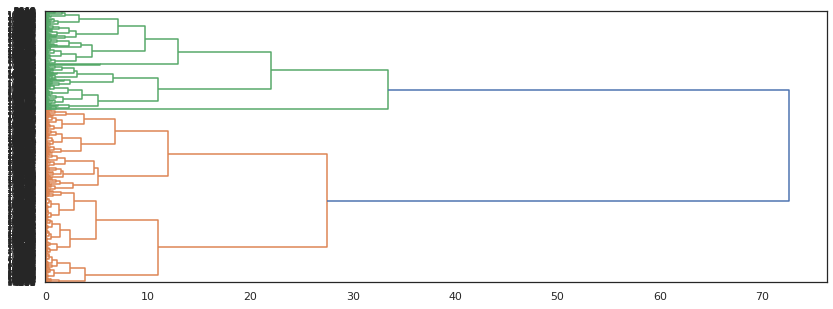

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right',
                labels=df_atividade7['ID'].values)

### Atividade 8: Qual quantidade parece adequada para o número de grupos?

In [ ]:
# seu código
grupos = fcluster(distancias, t=2, criterion='maxclust')
grupos

array([2, 1, 2, ..., 2, 2, 1], dtype=int32)

In [ ]:
df['grupos'] = grupos

In [ ]:
df['Days_Registered'] = df_atividade7['Days_Registered']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Dica: use gráficos para ter um bom entendimento de como os grupos se comparam.

In [ ]:
df[['Recency','Days_Registered','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal','Income']].corr()

,Recency,Days_Registered,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,Income
Recency,1.000000,0.030777,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.021198,-0.003970
Days_Registered,0.030777,1.000000,0.148720,0.059609,0.071345,0.078033,0.076423,0.144956,0.139107,-0.016712
MntWines,0.015721,0.148720,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.907634,0.578650
MntFruits,-0.005844,0.059609,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,0.592393,0.430842
MntMeatProducts,0.022518,0.071345,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,0.840678,0.584633
MntFishProducts,0.000551,0.078033,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,0.584132,0.438871
MntSweetProducts,0.025110,0.076423,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,0.586760,0.440744
MntGoldProds,0.017663,0.144956,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.518853,0.325916
MntTotal,0.021198,0.139107,0.907634,0.592393,0.840678,0.584132,0.586760,0.518853,1.000000,0.664794
Income,-0.003970,-0.016712,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,0.664794,1.000000


Muita correlação interessante entre as variáveis que formam MntTotal.
Ouro com correlação baixa entre os gastos variados.
Carne possui uma correlação moderada com os gastos variados.
Vinho com uma correlação moderada com Carne e fraca com os outros gastos.
Peixe com correlaçao moderada com Frutas e Doces.

Essas correlações mostram que alguns gastos possuem mais conexão com outros.



In [ ]:
df.loc[df.grupos==1,['Recency','Days_Registered','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal','Income']].corr()

,Recency,Days_Registered,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,Income
Recency,1.000000,0.024631,-0.014721,0.016027,0.013820,-0.012784,0.035662,0.013533,0.000361,-0.003899
Days_Registered,0.024631,1.000000,0.109951,0.145176,0.187404,0.173645,0.141123,0.226661,0.184336,-0.111805
MntWines,-0.014721,0.109951,1.000000,0.198077,0.569862,0.232914,0.223686,0.374912,0.916082,0.638130
MntFruits,0.016027,0.145176,0.198077,1.000000,0.532711,0.667545,0.615788,0.311441,0.459676,0.245114
MntMeatProducts,0.013820,0.187404,0.569862,0.532711,1.000000,0.571166,0.565436,0.436673,0.805341,0.491747
MntFishProducts,-0.012784,0.173645,0.232914,0.667545,0.571166,1.000000,0.684970,0.313859,0.470890,0.245945
MntSweetProducts,0.035662,0.141123,0.223686,0.615788,0.565436,0.684970,1.000000,0.310060,0.485352,0.253775
MntGoldProds,0.013533,0.226661,0.374912,0.311441,0.436673,0.313859,0.310060,1.000000,0.584798,0.221332
MntTotal,0.000361,0.184336,0.916082,0.459676,0.805341,0.470890,0.485352,0.584798,1.000000,0.633925
Income,-0.003899,-0.111805,0.638130,0.245114,0.491747,0.245945,0.253775,0.221332,0.633925,1.000000


In [ ]:
df.loc[df.grupos==1,['Recency','Days_Registered','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal','Income']].describe

,Recency,Days_Registered,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,Income
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,48.734607,-0.054186,110.714084,9.406936,45.186837,14.157820,9.598018,26.009908,200.915782,39473.472753
std,28.994205,0.992309,140.601295,17.860353,53.383339,26.713115,18.061386,35.266427,209.393957,14103.221512
min,0.000000,-2.202968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1730.000000
25%,24.000000,-0.821827,12.000000,1.000000,10.000000,2.000000,1.000000,5.000000,42.000000,29315.000000
50%,49.000000,-0.051659,40.000000,3.000000,22.000000,6.000000,3.000000,14.000000,94.000000,39062.000000
75%,74.000000,0.688392,171.000000,10.000000,64.000000,15.000000,10.000000,31.000000,316.000000,50200.000000
max,99.000000,2.370716,710.000000,155.000000,322.000000,259.000000,172.000000,321.000000,879.000000,73395.000000


No cluster 1 (grupo1)

In [ ]:
df.loc[df.grupos==2,['Recency','Days_Registered','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal','Income']].corr()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,Income
Recency,1.000000,0.029864,-0.039539,0.028068,-0.006251,0.017639,0.014048,0.040373,-0.031563
MntWines,0.029864,1.000000,-0.167377,-0.049209,-0.168826,-0.160612,-0.068582,0.696998,-0.095685
MntFruits,-0.039539,-0.167377,1.000000,0.210527,0.332038,0.316430,0.145632,0.188043,0.025298
MntMeatProducts,0.028068,-0.049209,0.210527,1.000000,0.251136,0.183711,-0.036220,0.631981,0.146899
MntFishProducts,-0.006251,-0.168826,0.332038,0.251136,1.000000,0.313379,0.194813,0.136739,0.030318
MntSweetProducts,0.017639,-0.160612,0.316430,0.183711,0.313379,1.000000,0.074973,0.169062,0.049420
MntGoldProds,0.014048,-0.068582,0.145632,-0.036220,0.194813,0.074973,1.000000,0.103901,-0.090547
MntTotal,0.040373,0.696998,0.188043,0.631981,0.136739,0.169062,0.103901,1.000000,0.013075
Income,-0.031563,-0.095685,0.025298,0.146899,0.030318,0.049420,-0.090547,0.013075,1.000000


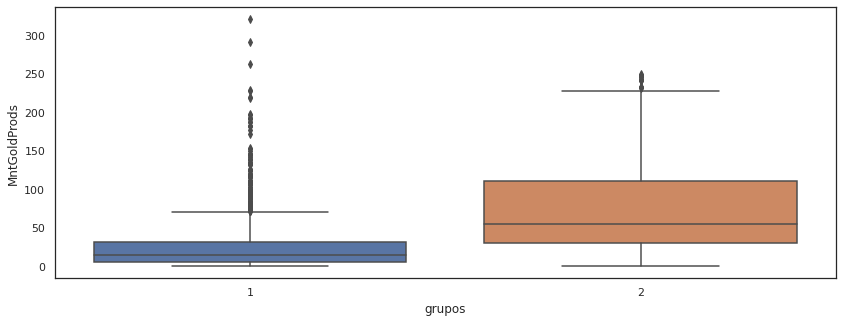

In [ ]:
# seu código
sns.boxplot(x=df['grupos'], y=df['MntGoldProds'])

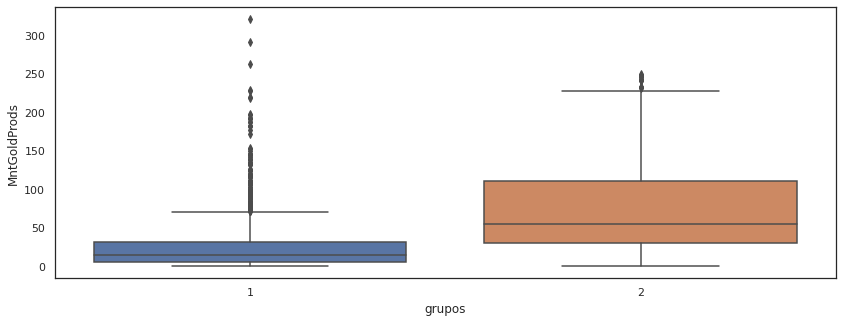

In [ ]:
sns.boxplot(x=df['grupos'], y=df['MntGoldProds'])

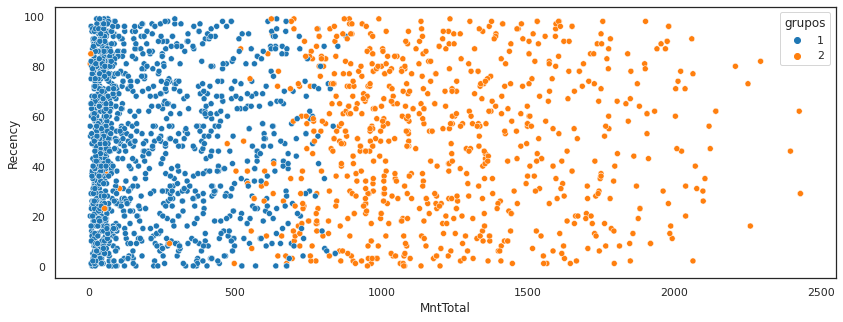

In [ ]:
sns.scatterplot(data=df, x='MntTotal', y='Recency',
                hue='grupos', palette='tab10');

In [ ]:
# seu código


In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

Podemos então considerar que:

* O grupo 1 é composto por pessas que têm altos salários, fazendo várias pedidos pela internet e o valor das compras é alto.  Isto pode sugerir consumidores que não são afetados por promoções e frequentemente comprar produtos de alto valor.

* O grupo 2 é composto por pessoas que têm baixos salários, compram frequentemente, fazendo poucos pedidos pela internet, e em geral, o valor das compras é baixo.

* O grupo 3 é composto por pessoas que têm baixos salários, compram com baixa frequência, fazendo poucos pedidos pela internet e o valor das compras é baixo. Isto pode sugerir consumidores que esperam aparecer promoções online para adquirir produtos de baixo valor.

* O grupo 4 é composto por pessoas que tenham salários médios, compram com baixa frequência e o valor das compras é baixo. Dentre os grupos, este é o que apresenta consumidores registrados a mais tempo, podendo indicar pessoas que têm baixa "lealdade" ou que perderam interesse no estabelecimento/marca.


### Para refletir: Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding